(244, 7)
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


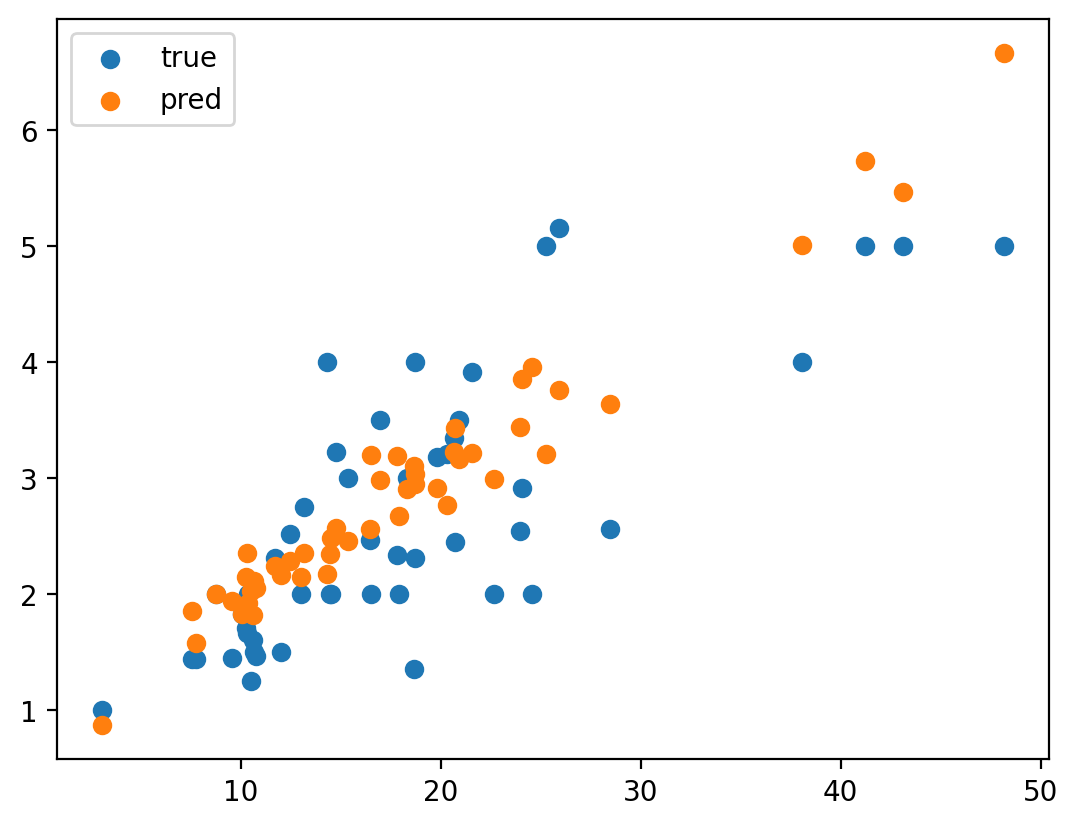

In [4]:
# scikit learn 이용하기


import seaborn as sns
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.




sns.get_dataset_names()


tips = sns.load_dataset("tips")
print(tips.shape)
print(tips.head())


import pandas as pd

tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=["sex", "smoker", "day", "time"])
tips = tips[
    [
        "total_bill",
        "size",
        "sex_Male",
        "sex_Female",
        "smoker_Yes",
        "smoker_No",
        "day_Thur",
        "day_Fri",
        "day_Sat",
        "day_Sun",
        "time_Lunch",
        "time_Dinner",
        "tip",
    ]
]


X = tips[
    [
        "total_bill",
        "size",
        "sex_Male",
        "sex_Female",
        "smoker_Yes",
        "smoker_No",
        "day_Thur",
        "day_Fri",
        "day_Sat",
        "day_Sun",
        "time_Lunch",
        "time_Dinner",
    ]
].values
y = tips["tip"].values


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


from sklearn.linear_model import LinearRegression

model = LinearRegression()


model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse


plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()